# IRAS 16562-3959 VLA SEDs

In [1]:
# Importing the libraries
from scipy import stats
from scipy import optimize
from astropy.io import ascii
import numpy as np
import matplotlib.pyplot as plt
from numpy import NaN

In [2]:
# Creating a list of central frequencies for the S-band and C-band

SPW_S_band = [2.097*10**9, 2.371*10**9, 2.627*10**9, 2.883*10**9, 3.115*10**9, 3.371*10**9,
              3.627*10**9, 3.883*10**9]   # central frequency in Hz

SPW_C_band = [4.2315*10**9, 4.7435*10**9, 5.2555*10**9, 5.7675*10**9, 6.2315*10**9, 6.7435*10**9,
              7.2555*10**9, 7.7675*10**9]   # central frequency in Hz


In [3]:
## Loading the S-band Data

# Creating empty lists for each source
OE_flux_S_band = []
IE_flux_S_band = []
C_flux_S_band = []
IW_flux_S_band = []
W1_flux_S_band = []
OW_flux_S_band = []

# Filling up the empty list with the S-band data
for i in range(1,9):
    flux_S_band = np.loadtxt('S_band_gaussian_fit_table_grp_{0}.ipac'.format(i),
                             skiprows = 4, unpack=True,usecols=[1])
    OE_flux_S_band.append(flux_S_band[0])
    IE_flux_S_band.append(flux_S_band[1])
    C_flux_S_band.append(flux_S_band[2])
    IW_flux_S_band.append(flux_S_band[3])
    W1_flux_S_band.append(flux_S_band[4])
    OW_flux_S_band.append(flux_S_band[5])


# Calculating the log for each list
SPW_S_band_log = np.log(SPW_S_band)
OE_flux_S_band_log = np.log(OW_flux_S_band)
IE_flux_S_band_log = np.log(W1_flux_S_band)
C_flux_S_band_log = np.log(C_flux_S_band)
IW_flux_S_band_log = np.log(IE_flux_S_band)
W1_flux_S_band_log = np.log(IW_flux_S_band)
OW_flux_S_band_log = np.log(OE_flux_S_band)

In [4]:
## Loading the C-band Data

# Creating empty lists for each source
OE_flux_C_band = []
IE_flux_C_band = []
C_flux_C_band = []
IW_flux_C_band = []
W1_flux_C_band = []
OW_flux_C_band = []

# Filling up the empty list with the S-band data
for j in range(1,9):
    flux_C_band = np.loadtxt('C_band_gaussian_fit_table_grp_{0}.ipac'.format(j),
                             skiprows = 4, unpack=True,usecols=[1])
    OE_flux_C_band.append(flux_C_band[0])
    IE_flux_C_band.append(flux_C_band[1])
    C_flux_C_band.append(flux_C_band[2])
    IW_flux_C_band.append(flux_C_band[3])
    W1_flux_C_band.append(flux_C_band[4])
    OW_flux_C_band.append(flux_C_band[5])

# Calculating the log for each list
SPW_C_band_log = np.log(SPW_C_band)
OE_flux_C_band_log = np.log(OW_flux_C_band)
IE_flux_C_band_log = np.log(W1_flux_C_band)
C_flux_C_band_log = np.log(C_flux_C_band)
IW_flux_C_band_log = np.log(IE_flux_C_band)
W1_flux_C_band_log = np.log(IW_flux_C_band)
OW_flux_C_band_log = np.log(OE_flux_C_band)

In [5]:
# Creating empty lists and filling them with the S-band and C-band data for each source

SPW_log = []
SPW_log.append(SPW_S_band_log)
SPW_log.append(SPW_C_band_log)


OE_flux_log = []
OE_flux_log.append(OE_flux_S_band_log)
OE_flux_log.append(OE_flux_C_band_log)


IE_flux_log = []
IE_flux_log.append(IE_flux_S_band_log)
IE_flux_log.append(IE_flux_C_band_log)


C_flux_log = []
C_flux_log.append(C_flux_S_band_log)
C_flux_log.append(C_flux_C_band_log)


IW_flux_log = []
IW_flux_log.append(IW_flux_S_band_log)
IW_flux_log.append(IW_flux_C_band_log)


W1_flux_log = []
W1_flux_log.append(W1_flux_S_band_log)
W1_flux_log.append(W1_flux_C_band_log)


OW_flux_log = []
OW_flux_log.append(OW_flux_S_band_log)
OW_flux_log.append(OW_flux_C_band_log)

In [6]:
### Outer East Lobe
# mask the values in both x and y for which there is a NaN in y:
SPW_log_1 = np.ma.masked_array(SPW_log,mask=np.isnan(OE_flux_log)).compressed()   
OE_flux_log_1 = np.ma.masked_array(OE_flux_log,mask=np.isnan(OE_flux_log)).compressed()
# Make a linear regression
slope_OE, intercept_OE, r_value_OE, p_value_OE, std_err_OE = stats.linregress(SPW_log_1,OE_flux_log_1)
# Printing the slope of the linear regression
print("OE spectral index is: ",slope_OE)
line_OE = slope_OE*SPW_log_1+intercept_OE


### Inner East Lobe
# mask the values in both x and y for which there is a NaN in y:
SPW_log_2 = np.ma.masked_array(SPW_log,mask=np.isnan(IE_flux_log)).compressed()   
IE_flux_log_2 = np.ma.masked_array(IE_flux_log,mask=np.isnan(IE_flux_log)).compressed()
# Make a linear regression
slope_IE, intercept_IE, r_value_IE, p_value_IE, std_err_IE = stats.linregress(SPW_log_2,IE_flux_log_2)
# Printing the slope of the linear regression
print("IE spectral index is: ",slope_IE)
line_IE = slope_IE*SPW_log_2+intercept_IE


### Central Source
# mask the values in both x and y for which there is a NaN in y:
SPW_log_3 = np.ma.masked_array(SPW_log,mask=np.isnan(C_flux_log)).compressed()   
C_flux_log_3 = np.ma.masked_array(C_flux_log,mask=np.isnan(C_flux_log)).compressed()
# Make a linear regression
slope_C, intercept_C, r_value_C, p_value_C, std_err_C = stats.linregress(SPW_log_3,C_flux_log_3)
# Printing the slope of the linear regression
print("C spectral index is: ",slope_C)
line_C = slope_C*SPW_log_3+intercept_C


### Inner West Lobe
# mask the values in both x and y for which there is a NaN in y:
SPW_log_4 = np.ma.masked_array(SPW_log,mask=np.isnan(IW_flux_log)).compressed()   
IW_flux_log_4 = np.ma.masked_array(IW_flux_log,mask=np.isnan(IW_flux_log)).compressed()
# Make a linear regression
slope_IW, intercept_IW, r_value_IW, p_value_IW, std_err_IW = stats.linregress(SPW_log_4,IW_flux_log_4)
# Printing the slope of the linear regression
print("IW spectral index is: ",slope_IW)
line_IW = slope_IW*SPW_log_4+intercept_IW


### Compact source W1
# mask the values in both x and y for which there is a NaN in y:
SPW_log_5 = np.ma.masked_array(SPW_log,mask=np.isnan(W1_flux_log)).compressed()   
W1_flux_log_5 = np.ma.masked_array(W1_flux_log,mask=np.isnan(W1_flux_log)).compressed()
# Make a linear regression
slope_W1, intercept_W1, r_value_W1, p_value_W1, std_err_W1 = stats.linregress(SPW_log_5,W1_flux_log_5)
# Printing the slope of the linear regression
print("W1 spectral index is: ",slope_W1)
line_W1 = slope_W1*SPW_log_5+intercept_W1


### Outer West Lobe
# mask the values in both x and y for which there is a NaN in y:
SPW_log_6 = np.ma.masked_array(SPW_log,mask=np.isnan(OW_flux_log)).compressed()   
OW_flux_log_6 = np.ma.masked_array(OW_flux_log,mask=np.isnan(OW_flux_log)).compressed()
# Make a linear regression
slope_OW, intercept_OW, r_value_OW, p_value_OW, std_err_OW = stats.linregress(SPW_log_6,OW_flux_log_6)
# Printing the slope of the linear regression
print("OW spectral index is: ",slope_OW)
line_OW = slope_OW*SPW_log_6+intercept_OW


OE spectral index is:  -1.32569606018
IE spectral index is:  -1.16268178382
C spectral index is:  0.627481928592
IW spectral index is:  -1.03885878145
W1 spectral index is:  -0.596394694309
OW spectral index is:  -1.66838229242


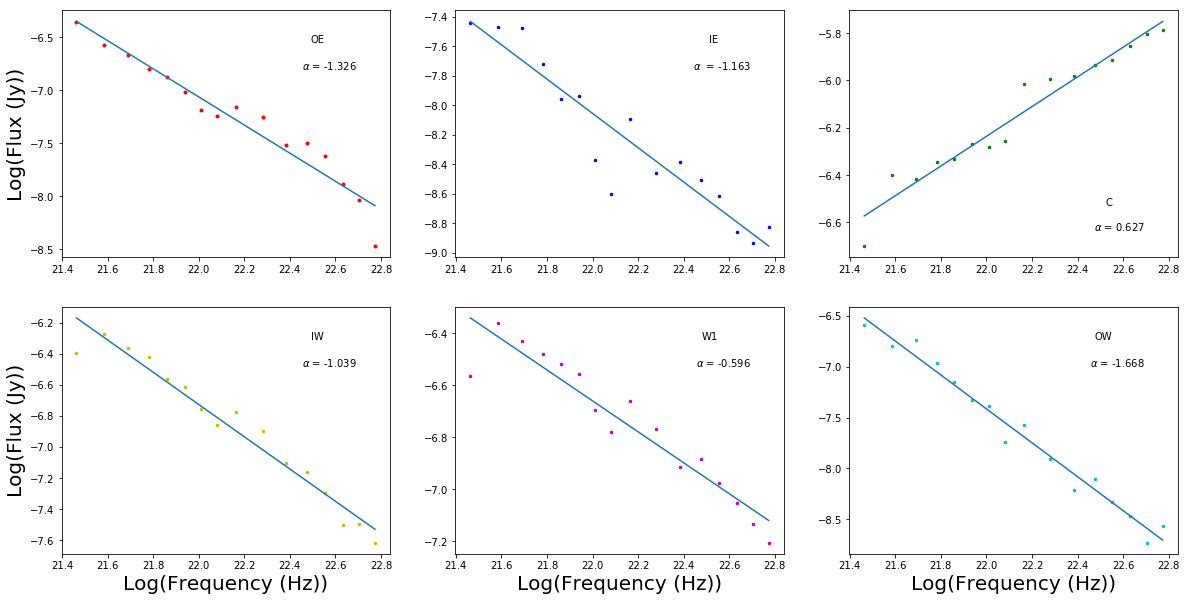

In [7]:
# Plotting the data and the linear regressions
plt.figure(figsize=(20,10))
plt.tick_params(labelsize=10)
ax1 = plt.subplot(231)
ax1.plot(SPW_log, OE_flux_log, '.r')
ax1.plot(SPW_log_1, line_OE)
ax1.text(0.8, 0.9, 'OE',transform=ax1.transAxes, ha='right', va='top')
ax1.text(0.9, 0.8, r'$\alpha$ = {0:.3f}'.format(slope_OE),transform=ax1.transAxes, ha='right', va='top')
ax1.set_ylabel('Log(Flux (Jy))', fontsize=20)

ax2 = plt.subplot(232)
ax2.plot(SPW_log, IE_flux_log, '.b',markersize=5.0)
ax2.plot(SPW_log_2, line_IE)
ax2.text(0.8, 0.9, 'IE',transform=ax2.transAxes, ha='right', va='top')
ax2.text(0.9, 0.8, r'$\alpha$  = {0:.3f}'.format(slope_IE),transform=ax2.transAxes, ha='right', va='top')

    
ax3 = plt.subplot(233)
ax3.plot(SPW_log, C_flux_log, '.g',markersize=5.0)
ax3.plot(SPW_log_3, line_C)
ax3.text(0.8, 0.2, 'C',transform=ax3.transAxes, ha='right', va='bottom')
ax3.text(0.9, 0.1, r'$\alpha$ = {0:.3f}'.format(slope_C),transform=ax3.transAxes, ha='right', va='bottom')


ax4 = plt.subplot(234)
ax4.plot(SPW_log, IW_flux_log, '.y',markersize=5.0)
ax4.plot(SPW_log_4, line_IW)
ax4.text(0.8, 0.9, 'IW',transform=ax4.transAxes, ha='right', va='top')
ax4.text(0.9, 0.8, r'$\alpha$ = {0:.3f}'.format(slope_IW),transform=ax4.transAxes, ha='right', va='top')
ax4.set_ylabel('Log(Flux (Jy))', fontsize=20)
ax4.set_xlabel('Log(Frequency (Hz))', fontsize=20)



ax5 = plt.subplot(235)
ax5.plot(SPW_log, W1_flux_log, '.m',markersize=5.0)
ax5.plot(SPW_log_5, line_W1)
ax5.text(0.8, 0.9, 'W1',transform=ax5.transAxes, ha='right', va='top')
ax5.text(0.9, 0.8, r'$\alpha$ = {0:.3f}'.format(slope_W1),transform=ax5.transAxes, ha='right', va='top')
ax5.set_xlabel('Log(Frequency (Hz))', fontsize=20)


ax6 = plt.subplot(236)
ax6.plot(SPW_log, OW_flux_log, '.c',markersize=5.0)
ax6.plot(SPW_log_6, line_OW)
ax6.text(0.8, 0.9, 'OW',transform=ax6.transAxes, ha='right', va='top')
ax6.text(0.9, 0.8, r'$\alpha$ = {0:.3f}'.format(slope_OW),transform=ax6.transAxes, ha='right', va='top')
ax6.set_xlabel('Log(Frequency (Hz))', fontsize=20)




plt.show()